# Python logic regression 


**Output variable**: Linear regression is used for predicting continuous/numeric outputs, like house prices. Logistic regression is used for predicting categorical/discrete outputs, like whether a patient has a disease or not.

**Range of output**: Linear regression output can take any numeric value. Logistic regression output is restricted to a range between 0 and 1, which can represent probabilities or class membership.

**Sigmoid function**: Logistic regression applies the sigmoid function to the output of the linear model to squash values between 0 and 1. Linear regression has no such function.

**Cost function**: Linear regression uses squared error cost. Logistic regression uses log-loss, which penalizes incorrect categorical predictions.

**Model fitting**: Linear regression fits a straight line. Logistic regression fits an S-shaped logistic function to the data.

**Assumptions:** Linear regression assumes linear relationship, normality of errors, etc. Logistic regression has less strict assumptions.

**Interpretation:** Linear regression coefficients represent the change in output for a unit change in input. Logistic regression coefficients represent the change in log-odds for a unit change in input.

In summary, linear regression is used for predicting numeric values, while logistic regression is used for predicting class membership probabilities or discrete class labels based on different mathematical foundations.

In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [20]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")

# Dictionary mapping integer codes to operating system names. 
    # Used to map the 'SistemaOperativo' column values to readable strings.0: 


'Windows',
clases = {
    0:'Windows',
    1: 'Linux',
    2: 'Mac'}

dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [22]:
dataframe['clase'].value_counts()

# Counts the number of rows for each class value in the 'clase' column of the dataframe, 
# and returns the counts as percentages of the total rows.


0    86
2    44
1    40
Name: clase, dtype: int64

In [11]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000




There are 170 total data points we are trying to make predictions for.

Each data point has information like:

How long something took (duracion)
Number of pages (paginas)
Number of actions (acciones)
A value amount (valor)
And the class or category it belongs to (clase).

Some of these values like the length of time and value amount vary a lot between data points. This might make it harder to predict the right class.

The classes seem to be imbalanced - where most data points belong to one class, and just a few belong to other class(es). Like if you had 100 dog photos and only 10 cat photos. This imbalance also makes it harder to train a model.

To better understand the classes, we'd want to look at what percentage of data points belong to each class. That would tell us how imbalanced they are.

Overall this looks like a tricky prediction problem because of the imbalance and variance. We would need to be careful about how we prepare the data and train models to make good predictions.

In [15]:
dataframe['clase'].value_counts(normalize=True)# Returns a Series containing counts of unique values in the 'clase' column of the DataFrame, normalized to percentages
                                               
                                               

# Returns a Series containing counts of unique values in the 'clase' column of the DataFrame, normalized to percentages


0    0.505882
2    0.258824
1    0.235294
Name: clase, dtype: float64

Looking at the class counts:

There are 86 examples belonging to the Windows (class 0)
There are 44 examples belonging to the Mac (class 2)
There are 40 examples belonging to Linux (class 1)
So in this dataset, the majority class with 50.59% of the examples is Windows. Linux has the fewest examples, and Mac is in between.

This means the dataset is imbalanced, with more examples of Windows systems than Linux or Mac.

When training a machine learning model to predict the operating system from this data, we would need to account for the class imbalance to ensure the model does not just predict the majority Windows class by default.

Some ways to handle the imbalance could be oversampling the minority classes, using class weights when training, orusing evaluation metrics like F1 score that account for imbalance.

<AxesSubplot: ylabel='duracion'>

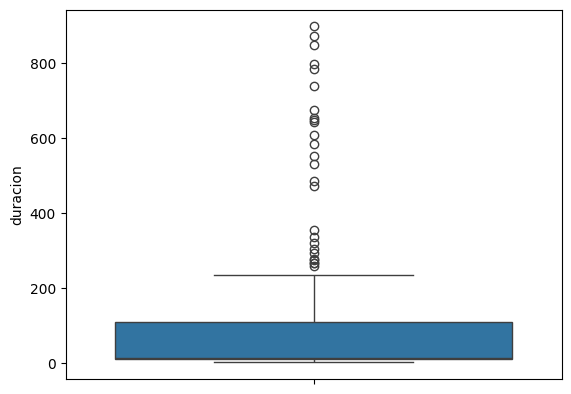

In [13]:
sns.boxplot(dataframe['duracion']) 

# Generates a box plot showing the distribution of values in the 'duracion' column of the dataframe


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [23]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

/var/folders/m8/hp9mxxbj6dv9x3px18fy22_r0000gn/T/ipykernel_12992/411264922.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['clase'], 1).hist()


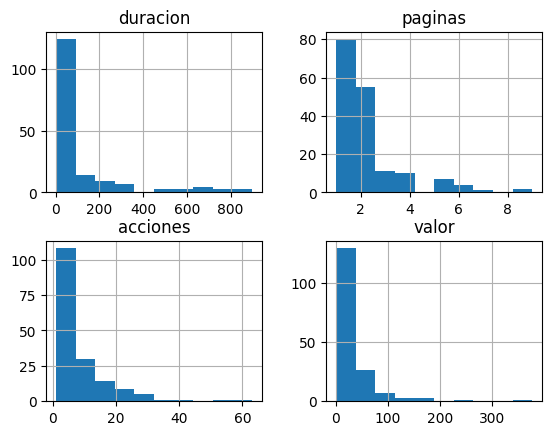

In [24]:
dataframe.drop(['clase'], 1).hist()
plt.show()

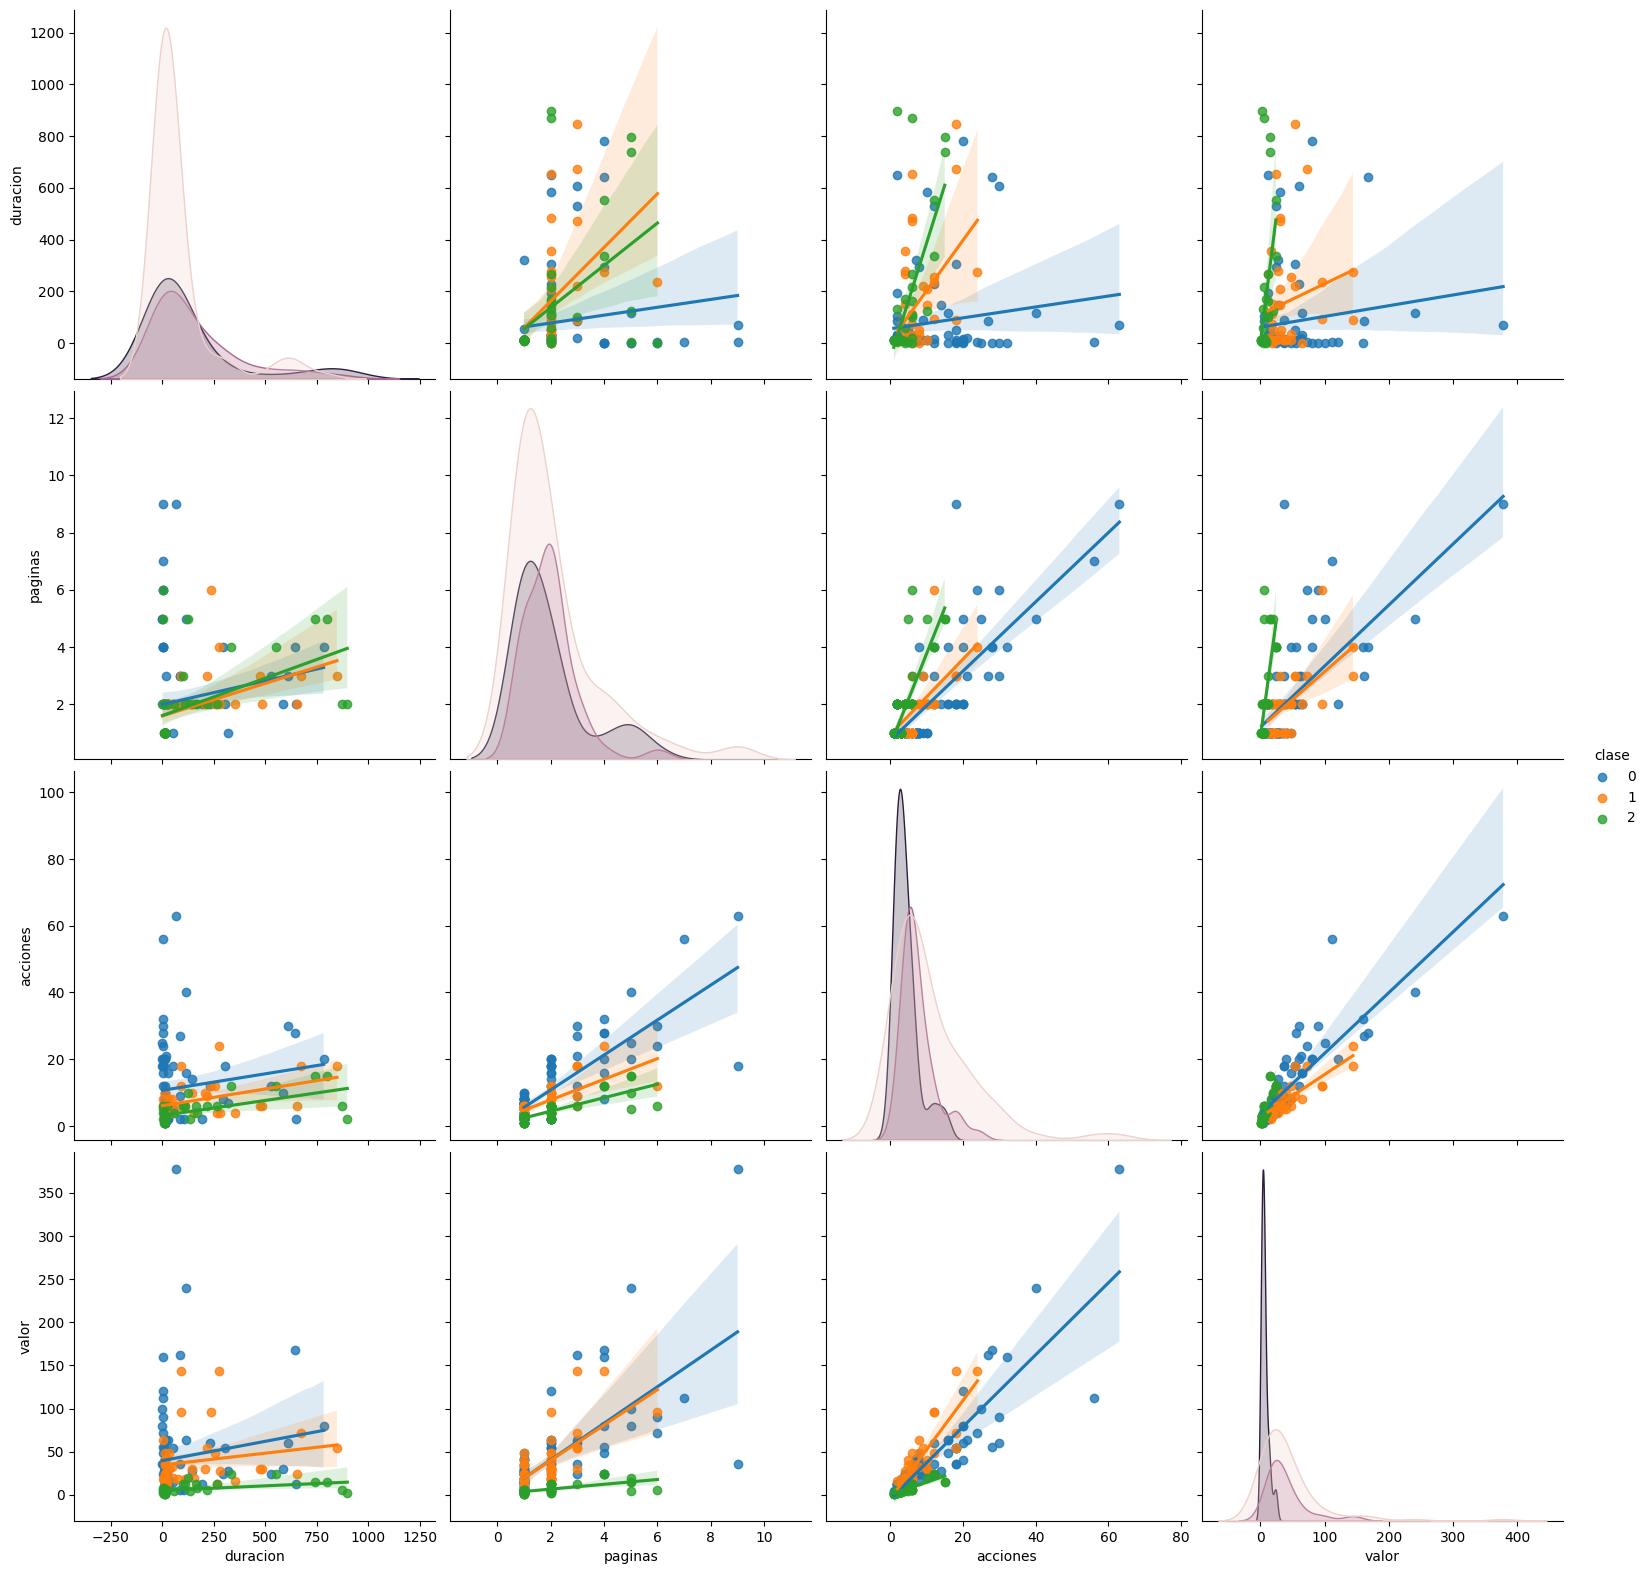

In [25]:
sns.pairplot(dataframe.dropna(),
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # "reg" de regresión lineal

## Creamos el modelo

In [27]:
X = np.array(dataframe.drop(['clase'], 1))
# Extracts the feature columns from the dataframe into a numpy array X. 
# Drops the 'clase' target column from the dataframe first.

y = np.array(dataframe['clase'])
# Converts the 'clase' column from the dataframe into a numpy array y.
# This extracts the target variable that will be used for model training.


/var/folders/m8/hp9mxxbj6dv9x3px18fy22_r0000gn/T/ipykernel_12992/3167610326.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['clase'], 1))


In [28]:
from sklearn.linear_model import LogisticRegression 

further reading: xgboost / api is a python package that allows you to build and train an xgboost model. xgboos is speciallised in speed and performance.

In [29]:
# the model will take 1000 iterations to converge. hyperparameter tuning can be done to improve the model performance.
model = LogisticRegression(max_iter=1000)

'''Trains the logistic regression model on the given features X 
and labels y. 
Fits the model parameters to the data.'''

model.fit(X, y)

LogisticRegression(max_iter=1000)

In [30]:
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0
 0 1 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [31]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))


# Prints the predictions probabilities rounded to 2 decimal places


[[0.22 0.09 0.68]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.18 0.08 0.74]
 [0.28 0.1  0.62]
 [0.27 0.08 0.65]
 [0.05 0.05 0.91]
 [0.22 0.09 0.69]
 [0.09 0.06 0.84]
 [0.   0.   1.  ]
 [0.13 0.07 0.8 ]
 [0.32 0.09 0.6 ]
 [0.1  0.06 0.84]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.23 0.09 0.68]
 [0.   0.   1.  ]
 [0.65 0.34 0.01]
 [0.58 0.42 0.  ]
 [0.73 0.27 0.  ]
 [0.71 0.29 0.  ]
 [0.32 0.68 0.  ]
 [0.82 0.18 0.  ]
 [0.46 0.54 0.  ]
 [0.78 0.22 0.  ]
 [0.37 0.63 0.  ]
 [0.09 0.91 0.  ]
 [0.72 0.28 0.  ]
 [0.45 0.52 0.03]
 [0.5  0.5  0.  ]
 [0.35 0.65 0.  ]
 [0.22 0.78 0.  ]
 [0.26 0.74 0.  ]
 [0.22 0.78 0.  ]
 [0.64 0.36 0.  ]
 [0.01 0.   0.99]
 [0.03 0.02 0.95]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.81 0.19 0.  ]
 [0.61 0.39 0.  ]
 [0.54 0.46 0.  ]
 [0.23 0.77 0.  ]
 [0.68 0.32 0.  ]
 [0.28 0.72 0.  ]
 [0.57 0.43 0.  ]
 [0.41 0.59 0.  ]
 [0.76 0.24 0.  ]
 [0.99 0.01 0.  ]
 [0.77 0.23 0.  ]
 [0.78 0.22 0.  ]
 [0.97 0.03 0.  ]
 [0.99 0.01 0.  ]
 [0.91 0.09 0.  ]
 [0.98 0.0

In [32]:
model.score(X, y)

"""
score(X, y)

Calculate accuracy score for the model on the provided X and y data.

Parameters:
X (array-like): Data, shape = (n_samples, n_features)
y (array-like): True labels for X, shape = (n_samples,)  

Returns:
score (float): Accuracy score between 0 and 1.
"""


0.7764705882352941

In [ ]:
model.classes_

# Validación del Modelo

In [34]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed) 

# Splits the input data X and target data y into train and test sets for model evaluation. 
                                                                    # Uses sklearn's train_test_split utility.
                                                                    # Args:
                                                                    #   X: Input features data
                                                                    #   y: Target data 
                                                                    #   test_size: Fraction of data to hold out for testing
                                                                    #   random_state: Seed for random number generator for reproducibility  
                                                                    y,

In [ ]:
# name='Logistic Regression'
# kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
# cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(cv_results)
# print(msg)

In [35]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [36]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8529411764705882


In [37]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 85.29 %
Error: 14.71 %


## Resultados

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report   

In [41]:
c_matrix = confusion_matrix(Y_test, predictions)

In [42]:
print(c_matrix)

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


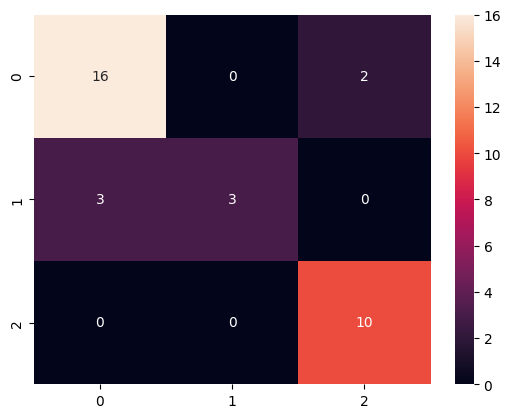

In [43]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

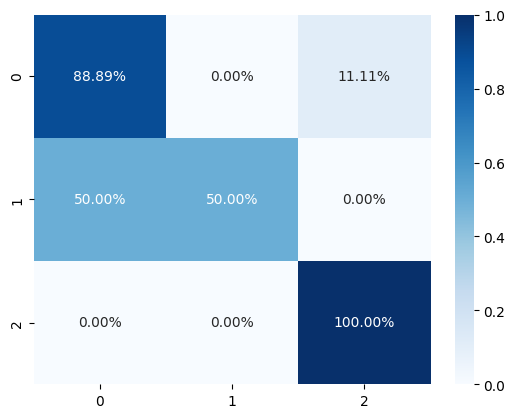

In [44]:
sns.heatmap(confusion_matrix(Y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score

multilabel_confusion_matrix(Y_test, predictions)

array([[[13,  3],
        [ 2, 16]],

       [[28,  0],
        [ 3,  3]],

       [[22,  2],
        [ 0, 10]]])

print(clasification_report(y_test, y_pred)) 

In [51]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



[Nice confusion matrix catalog visuals examples](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

# Clasificación de nuevos registros

In [52]:
X_new = pd.DataFrame({'duracion': [8],
                     'paginas': [5],
                     'acciones': [5],
                     'valor': [2]})
X_new

,duracion,paginas,acciones,valor
0,8,5,5,2


In [53]:
X_new.values

array([[8, 5, 5, 2]])

In [54]:
model.predict(X_new.values)

array([2])

In [56]:
model.coef_

array([[-3.39534918e-03, -5.08111365e-01, -4.74049299e-01,
         3.99727155e-01],
       [-7.12208395e-04, -1.03724147e-01, -8.35669301e-01,
         4.46336726e-01],
       [ 4.10755758e-03,  6.11835512e-01,  1.30971860e+00,
        -8.46063881e-01]])

### Ejercicio: ¿Cómo sacamos la predicción del nuevo valor?